In [31]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
REF_bp = "ref_bp"
REF_chr = "ref_chr"

In [10]:
df = pd.read_table('good_snps_with_position.csv', sep=',')
df.sort_values(by=[REF_chr, REF_bp], inplace=True)

In [16]:
df[df[REF_chr]==20].head()

,ref_rs_id,ref_chr,ref_bp,ref_af,ref_allele,ref_other_allele,ref_snp_num
1142693,rs4814683,20,61795,0.6680,G,T,4814683
1142694,rs6139074,20,63244,0.8012,A,C,6139074
1142695,rs1418258,20,63799,0.6680,C,T,1418258
1142696,rs6086616,20,68749,0.6849,C,T,6086616
1142697,rs6039403,20,69094,0.4026,A,G,6039403


In [4]:
# extract core SNPs
def extract_core_snps(df, distance_core_SNPs = 10**6):
    for chrom in tqdm(range(1,23)):
        temp = df[df[REF_chr]==chrom]
        start = min(temp[REF_bp])
        ind_to_drop = []
        for index, row in temp.iterrows():
            if row[REF_bp] < start + distance_core_SNPs:
                ind_to_drop.append(index)
            else:
                start = row[REF_bp]
        df.drop(ind_to_drop, inplace = True)
    return(df)

In [5]:
filtered_snps = extract_core_snps(df)

100%|██████████| 22/22 [02:18<00:00,  6.31s/it]


In [6]:
filtered_snps.shape

(2659, 7)

23412861


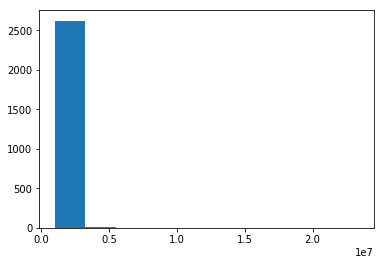

In [38]:
l = list(filtered_snps[filtered_snps[REF_chr]==3][REF_bp])
res = []
for chrom in range(1,23):
    l = list(filtered_snps[filtered_snps[REF_chr]==chrom][REF_bp])
    for index, i in enumerate(l):
        if index == 0:
            pass
        else:
            res.append(i-l[index-1])

print(max(res))
plt.hist(res)
plt.show()

In [39]:
filtered_snps[filtered_snps[REF_chr]==1].head()

,ref_rs_id,ref_chr,ref_bp,ref_af,ref_allele,ref_other_allele,ref_snp_num
270,rs4648726,1,1752955,0.06759,C,T,4648726
643,rs6680471,1,2754512,0.53180,C,T,6680471
1134,rs1891941,1,3755675,0.94433,C,T,1891941
1783,rs7518469,1,4756276,0.94036,G,T,7518469
2489,rs7521197,1,5758772,0.07654,C,T,7521197


In [8]:
filtered_snps.to_csv("core_snps.csv", index=False, sep='\t')